In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!pip install keras==2.3.1

In [3]:
#!pip install tensorflow==2.0.0-beta1

In [4]:
import keras

In [5]:
import tensorflow as tf

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [8]:
from keras.optimizers import Adam

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
import matplotlib.pyplot as plt

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
train_path = '/content/drive/MyDrive/drawings/training'
test_path = '/content/drive/MyDrive/drawings/testing'

In [13]:
train= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
training_set = train.flow_from_directory(train_path, target_size=(224, 224), class_mode = 'categorical', classes=['healthy', 'parkinson'], batch_size=24)
val_set = train.flow_from_directory(test_path, target_size=(224, 224), class_mode = 'categorical', classes=['healthy', 'parkinson'], batch_size=24)

Found 144 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [14]:
print(training_set.image_shape)

(224, 224, 3)


(24, 224, 224, 3)


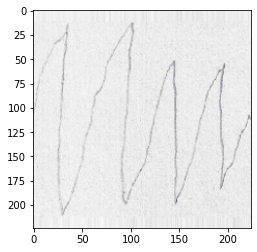

(24, 224, 224, 3)


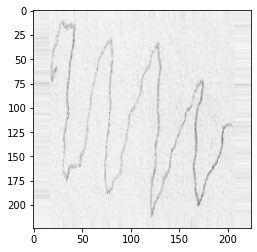

(24, 224, 224, 3)


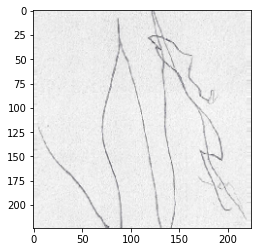

In [15]:
for _ in range(0, 3):
  img, label = training_set.next()
  print(img.shape)
  plt.imshow(img[0])
  plt.show()

In [16]:
vgg16_model = keras.applications.vgg16.VGG16()

In [17]:
model = Sequential()

In [18]:
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)

In [19]:
for layer in model.layers:
  layer.trainable = False

In [20]:
model.add(Dense(2, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [22]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=65)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
History = model.fit_generator(training_set, steps_per_epoch=2, validation_data=val_set, validation_steps=1, epochs=25, verbose=2, callbacks=es)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
2/2 - 39s - loss: 1.0703 - accuracy: 0.5625 - val_loss: 0.9776 - val_accuracy: 0.3750
Epoch 2/25
2/2 - 37s - loss: 1.0269 - accuracy: 0.3958 - val_loss: 0.9071 - val_accuracy: 0.4583
Epoch 3/25
2/2 - 37s - loss: 0.7158 - accuracy: 0.5833 - val_loss: 0.6367 - val_accuracy: 0.7500
Epoch 4/25
2/2 - 37s - loss: 0.7150 - accuracy: 0.6458 - val_loss: 0.8831 - val_accuracy: 0.5000
Epoch 5/25
2/2 - 37s - loss: 0.7681 - accuracy: 0.5417 - val_loss: 0.5736 - val_accuracy: 0.7500
Epoch 6/25
2/2 - 37s - loss: 0.6014 - accuracy: 0.7292 - val_loss: 0.5832 - val_accuracy: 0.5833
Epoch 7/25
2/2 - 38s - loss: 0.6477 - accuracy: 0.5625 - val_loss: 0.6486 - val_accuracy: 0.5833
Epoch 8/25
2/2 - 37s - loss: 0.5614 - accuracy: 0.7083 - val_loss: 0.4768 - val_accuracy: 0.8750
Epoch 9/25
2/2 - 37s - loss: 0.5918 - accuracy: 0.7708 - val_loss: 0.5170 - val_accuracy: 0.7083
Epoch 10/25
2/2 - 38s - loss: 0.5019 - accuracy: 0.7708 - val_loss: 0.5013 - val_accuracy: 0.7500
Epoch 11/25
2/2 - 37s - loss:

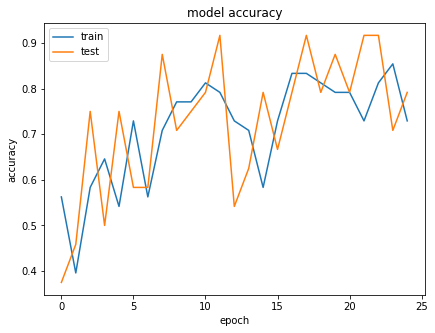

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

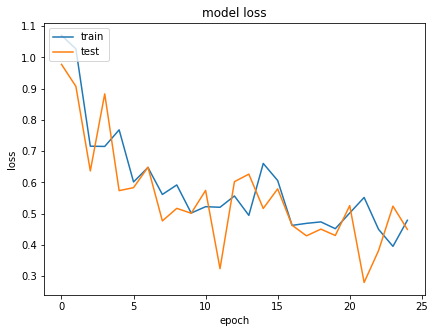

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [27]:
scores = model.evaluate(val_set)
scores[1]

3/3 [==============================] - 31s 9s/step - loss: 0.4149 - accuracy: 0.8333


0.8333333134651184